In [1]:
from openimages.download import download_dataset
import os
import glob
import shutil
from PIL import Image, ImageDraw
import numpy as np
import yaml
from ultralytics.data.utils import visualize_image_annotations

In [2]:
classes = ['Screwdriver', 'Hammer', 'Wrench', 'Power plugs and sockets', 'Door handle']#, 'Nail (Construction)']
label_map = {i: c.lower() for i, c in enumerate(classes)}

In [3]:
processed_dataset_name = 'openimages-basic-v0'
download_dir = '../data/raw/openimages-download-v0'
output_dir = f'../data/processed/{processed_dataset_name}'

In [4]:
if not os.path.exists(download_dir):
	data_dict = download_dataset(dest_dir=download_dir, class_labels=classes, annotation_format="darknet", limit=50)

	print('\n\n', data_dict)

In [5]:
# Rename every folder of the format "../../data/raw/openimages-download-v0/{class_name}/darknet" to "../../data/raw/openimages-download-v0/{class_name}/labels"
for class_name in classes:
	class_path = os.path.join(download_dir, class_name, 'darknet')
	if os.path.exists(class_path):
		new_class_path = os.path.join(download_dir, class_name, 'labels')
		if not os.path.exists(new_class_path):
			os.rename(class_path, new_class_path)
			print(f"Renamed {class_path} to {new_class_path}")
		else:
			print(f"Path already exists: {new_class_path}")
	else:
		print(f"Path does not exist: {class_path}")

Path does not exist: ../data/raw/openimages-download-v0/Screwdriver/darknet
Path does not exist: ../data/raw/openimages-download-v0/Hammer/darknet
Path does not exist: ../data/raw/openimages-download-v0/Wrench/darknet
Path does not exist: ../data/raw/openimages-download-v0/Power plugs and sockets/darknet
Path does not exist: ../data/raw/openimages-download-v0/Door handle/darknet


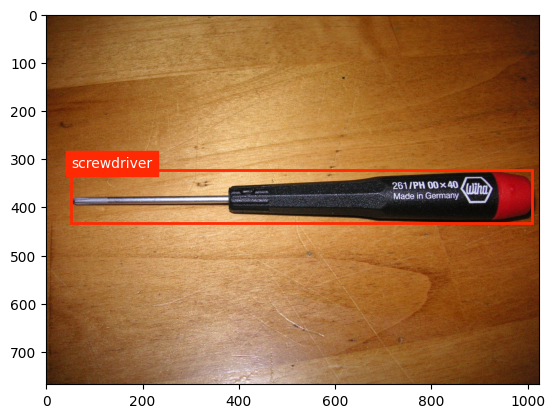

In [6]:
  
# Show a sample image with bounding boxes
# Get a valid filename
images_dir = os.path.join(download_dir, 'screwdriver', 'images')
image_path = os.path.join(images_dir, [f for f in os.listdir(images_dir) if f.endswith('.jpg')][1])
label_path = image_path.replace('/images/', '/labels/').replace('.jpg', '.txt')
visualize_image_annotations(image_path, label_path, label_map=label_map)

In [7]:
def get_filenames(folder):
	filenames = set()
	
	for path in glob.glob(os.path.join(folder, '*.jpg')):
		# Extract the filename
		if 'mask' in path:
			continue
		filename = os.path.split(path)[-1]        
		filenames.add(filename)

	return filenames

In [8]:
train_size=6
val_size=10
test_size=15

# Check if directory already exists (to avoid overwriting files, which creates duplicate bounding box labels)
if not os.path.exists(output_dir):
	np.random.seed(0)
	for class_name in classes:
		class_name = class_name.lower()
		# Get the filenames for the current class
		class_images = np.array(list(get_filenames(f'{download_dir}/{class_name}/images')))
		print(f'Class: {class_name}, Number of images: {len(class_images)}')
		np.random.shuffle(class_images)
		
		for i, image_name in enumerate(class_images):
			# Label filename
			label_name = image_name.replace('.jpg', '.txt')
			
			# Split into train, val, or test
			if i < train_size:
				split = 'train'
			elif i < train_size + val_size:
				split = 'val'
			elif i < train_size + val_size + test_size:
				split = 'test'
			
			# Source paths
			source_image_path = f'{download_dir}/{class_name}/images/{image_name}'
			source_label_path = f'{download_dir}/{class_name}/darknet/{label_name}'

			# Destination paths
			target_image_folder = f'{output_dir}/{split}/images'
			target_label_folder = f'{output_dir}/{split}/labels'
			
			if not os.path.exists(target_image_folder):
				os.makedirs(target_image_folder)
			if not os.path.exists(target_label_folder):
				os.makedirs(target_label_folder)

			# Copy files
			shutil.copy(source_image_path, target_image_folder)
			shutil.copy(source_label_path, target_label_folder)

In [9]:
data = {
	'train': f'{output_dir}/train/images',
	'val': f'{output_dir}/val/images',
	'test': f'{output_dir}/test/images',
	'nc': len(classes),
	'names': [c.lower() for c in classes]
}

# Create the YAML file
with open(f'../data/{processed_dataset_name}.yaml', 'w') as outfile:
	yaml.dump(data, outfile, default_flow_style=False)

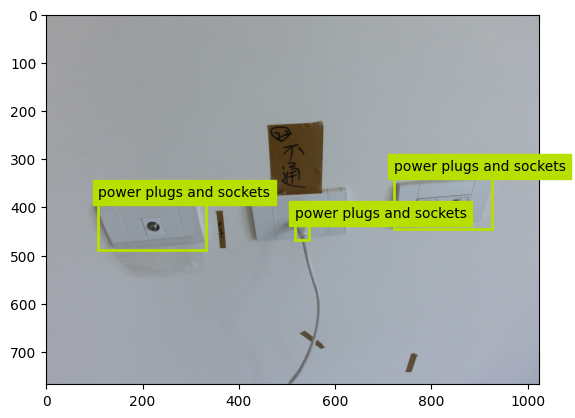

In [20]:
# # image_path = '/home/vikhyat/RIPS25-AnalogDevices-ObjectDetection/data/processed/openimages-basic-v0/train/images/00d9a083e1cba929.jpg'
# image_path = "/home/vikhyat/RIPS25-AnalogDevices-ObjectDetection/data/processed/cutNpaste-v0/train/images/synthetic_000000.jpg"
# label_path = image_path.replace('/images/', '/labels/').replace('.jpg', '.txt')
# show_bbox(image_path, label_path)

idx = 29
split = 'train'
images_dir = f'/home/vikhyat/RIPS25-AnalogDevices-ObjectDetection/data/processed/openimages-basic-v0/{split}/images'
image_path = os.path.join(images_dir, [f for f in os.listdir(images_dir) if f.endswith('.jpg') and ('mask' not in f)][idx])
label_path = image_path.replace('/images/', '/labels/').replace('.jpg', '.txt')
visualize_image_annotations(image_path, label_path, label_map=label_map)